In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df  =  pd.read_csv('Dataset of Diabetes .csv')

In [4]:
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS,Diabetes
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,0.0
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N,0.0
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,0.0
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,0.0
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
 14  Diabetes   946 non-null    float64
dtypes: float64(9), int64(4), object(2)
memory usage: 117.3+ KB


In [8]:
df_2 = df.dropna()

In [9]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 946 entries, 0 to 999
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         946 non-null    int64  
 1   No_Pation  946 non-null    int64  
 2   Gender     946 non-null    object 
 3   AGE        946 non-null    int64  
 4   Urea       946 non-null    float64
 5   Cr         946 non-null    int64  
 6   HbA1c      946 non-null    float64
 7   Chol       946 non-null    float64
 8   TG         946 non-null    float64
 9   HDL        946 non-null    float64
 10  LDL        946 non-null    float64
 11  VLDL       946 non-null    float64
 12  BMI        946 non-null    float64
 13  CLASS      946 non-null    object 
 14  Diabetes   946 non-null    float64
dtypes: float64(9), int64(4), object(2)
memory usage: 118.2+ KB


In [10]:
sex = pd.get_dummies(df_2['Gender'],drop_first = True)

In [12]:
df_2 = pd.concat([df_2, sex], axis = 1)

In [13]:
df_2.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS,Diabetes,M
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,0.0,False
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N,0.0,True
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,0.0,False
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,0.0,False
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N,0.0,True


In [14]:
#Data Cleaning Done, Time for Kneighbors
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [18]:
#Scaler Fit
scaler.fit(df_2.drop(['Diabetes','CLASS', 'Gender','No_Pation'], axis = 1))

StandardScaler()

In [20]:
scaled_features = scaler.transform(df_2.drop(['Diabetes','CLASS', 'Gender',
                                              'No_Pation'], axis = 1))

In [28]:
#Scaled Dataframe
df_feat = pd.DataFrame(scaled_features, 
                       columns = ['X','ID','AGE','Urea','Cr','HbA1c','Chol','TG','HDL','LDL',
                       'BMI','M'])

In [29]:
df_feat.head()

,X,ID,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,BMI,M
0,0.689412,-0.485462,-0.153983,-0.379368,-1.381424,-0.517088,-1.032242,1.770797,-1.078781,-0.373892,-1.212190,-1.123903
1,1.664644,-3.314496,-0.221213,-0.116475,-1.381424,-0.897809,-0.679411,-0.162725,-0.457828,-0.347274,-1.417663,0.889757
2,0.346197,-0.485462,-0.153983,-0.379368,-1.381424,-0.517088,-1.032242,1.770797,-1.078781,-0.373892,-1.212190,-1.123903
3,1.434439,-0.485462,-0.153983,-0.379368,-1.381424,-0.517088,-1.032242,1.770797,-1.078781,-0.373892,-1.212190,-1.123903
4,0.697783,-2.489361,0.652776,-0.379368,-1.381424,0.015921,-0.961676,-0.608923,-0.546536,-0.400510,-1.828610,0.889757


In [27]:
#Preparing to Test, Train and Split
from sklearn.model_selection import train_test_split

In [30]:
X = df_feat
y = df_2['Diabetes']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=101)

In [35]:
#Importing the KNN module
from sklearn.neighbors import KNeighborsClassifier

In [36]:
knn = KNeighborsClassifier(n_neighbors= 1)

In [37]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [38]:
pred = knn.predict(X_test)

In [39]:
from sklearn.metrics import classification_report, confusion_matrix

In [41]:
print(classification_report(y_test,pred))
print("\n")
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.64      0.68      0.66        34
         1.0       0.96      0.96      0.96       298

    accuracy                           0.93       332
   macro avg       0.80      0.82      0.81       332
weighted avg       0.93      0.93      0.93       332



[[ 23  11]
 [ 13 285]]


In [42]:
#Using the Elbow Method to get K
error_rate = []

for i in range (1,40):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

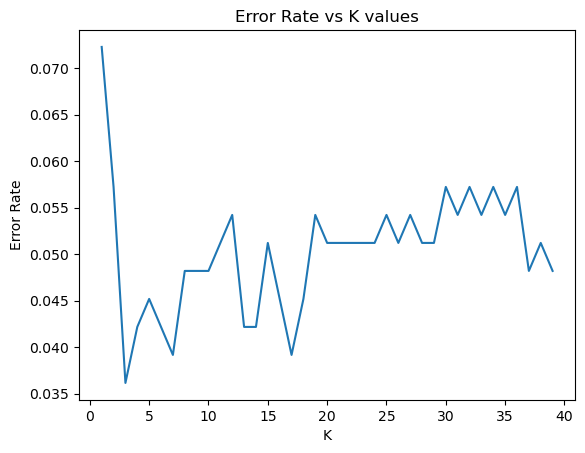

In [43]:
plt.plot(range(1,40),error_rate)
plt.title('Error Rate vs K values')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [46]:
knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('K = 3')
print(classification_report(y_test,pred))
print("\n")
print(confusion_matrix(y_test,pred))

K = 3
              precision    recall  f1-score   support

         0.0       0.81      0.85      0.83        34
         1.0       0.98      0.98      0.98       298

    accuracy                           0.96       332
   macro avg       0.89      0.91      0.90       332
weighted avg       0.96      0.96      0.96       332



[[ 29   5]
 [  7 291]]
